# 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
%cd /content/drive/MyDrive/Artificial Neural Network FALL2020/Mini Project 2/QQ1

/content/drive/MyDrive/Artificial Neural Network FALL2020/Mini Project 2/QQ1


In [8]:
import numpy as np
import copy
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt

In [9]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [10]:
def ode_func(theta, t, g, l, m):
  theta1 = theta[0]
  theta2 = theta[1]
  dtheta1_dt = theta2
  dtheta2_dt = -((g/1)*math.sin(theta1));
  dtheta_dt = [dtheta1_dt, dtheta2_dt]
  return dtheta_dt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


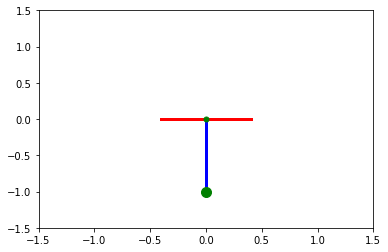

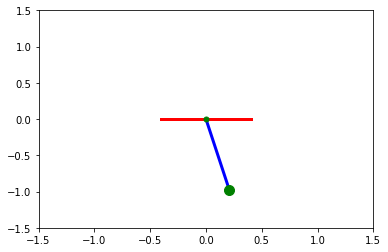

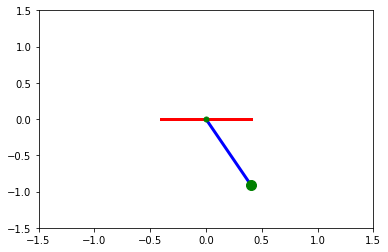

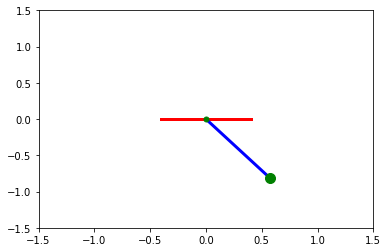

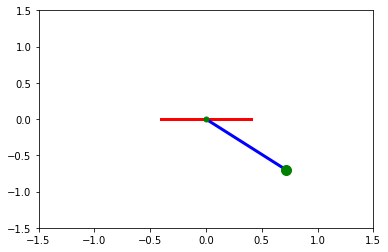

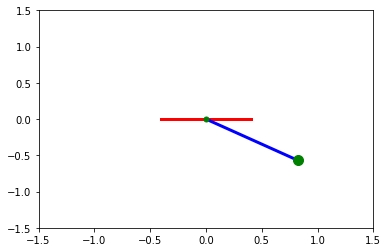

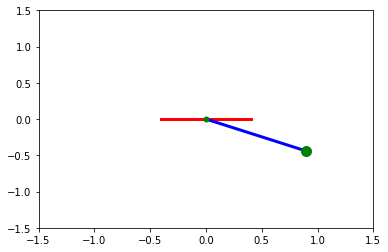

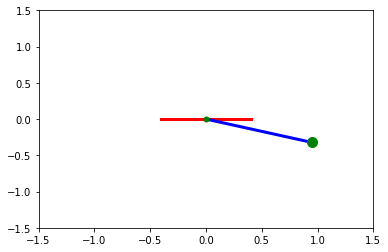

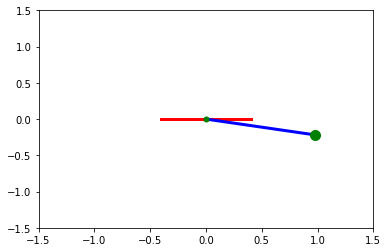

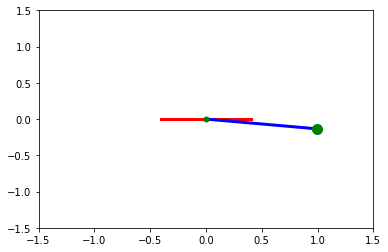

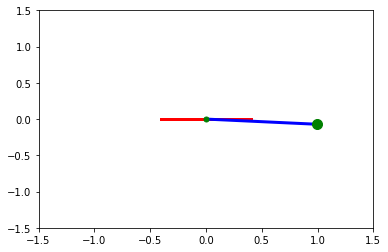

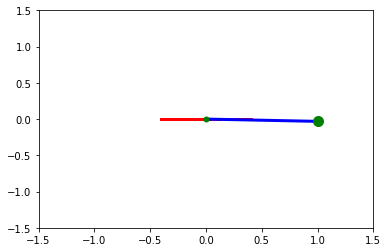

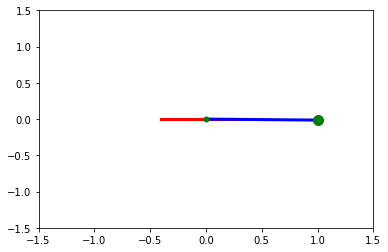

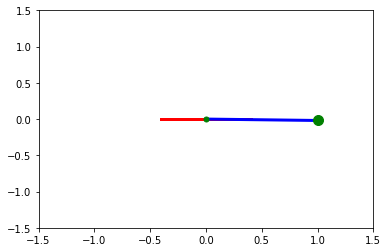

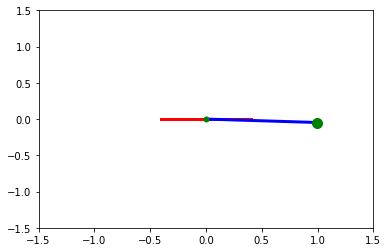

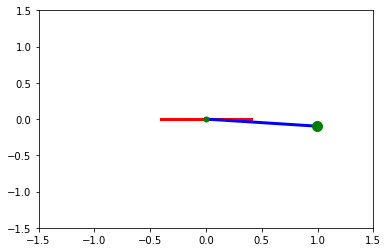

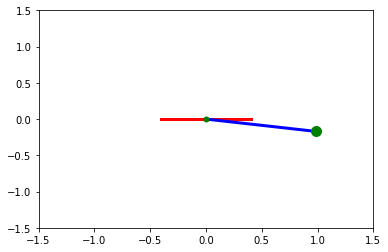

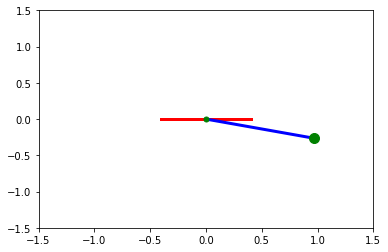

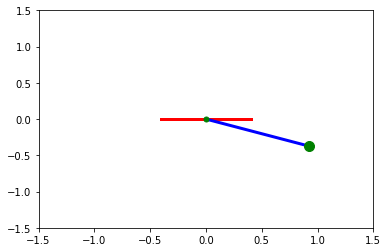

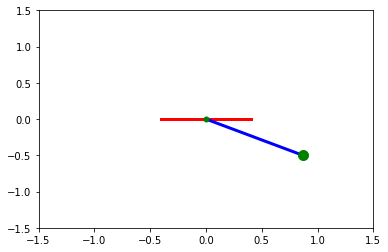

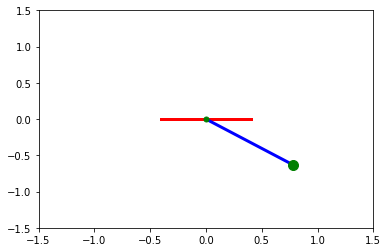

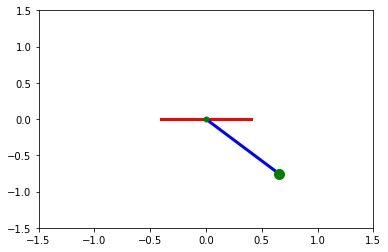

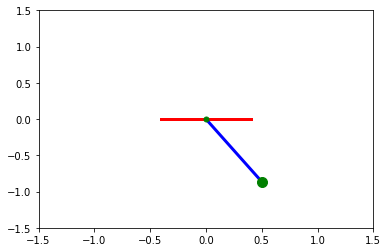

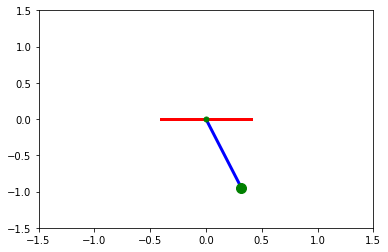

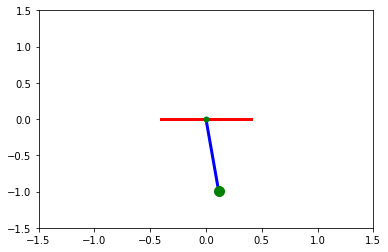

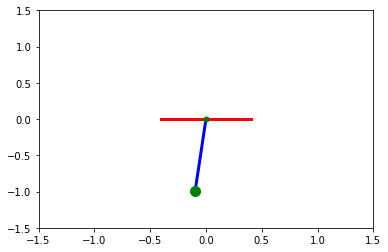

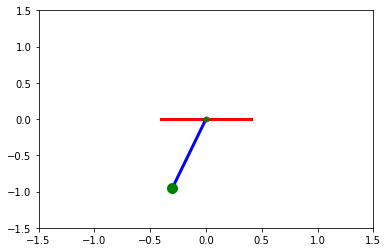

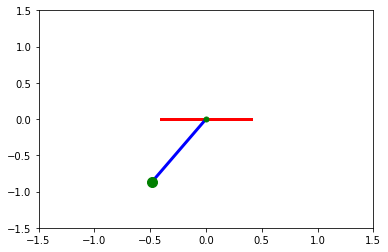

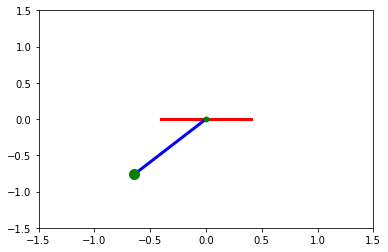

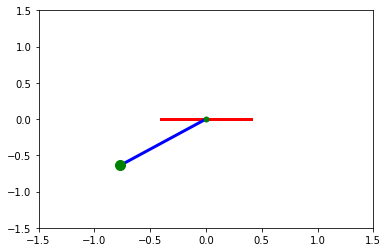

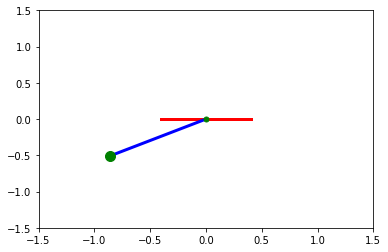

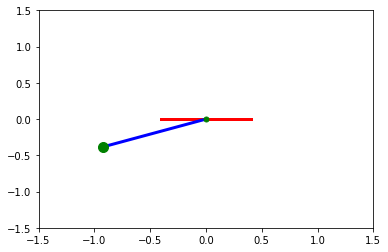

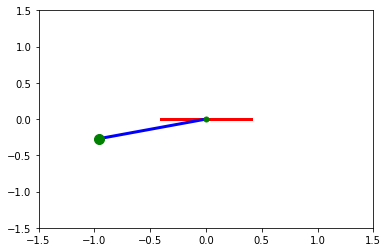

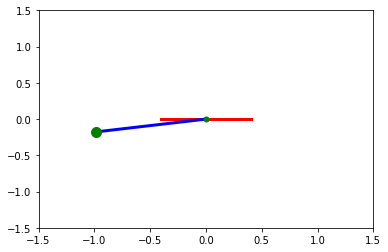

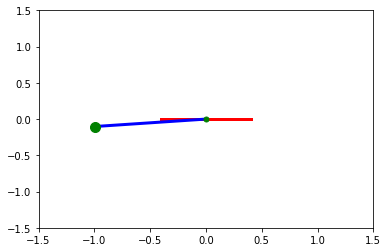

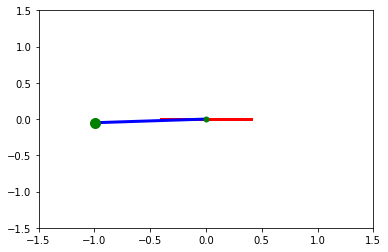

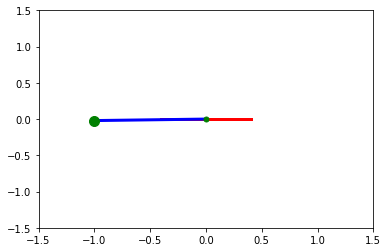

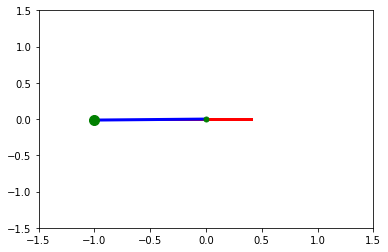

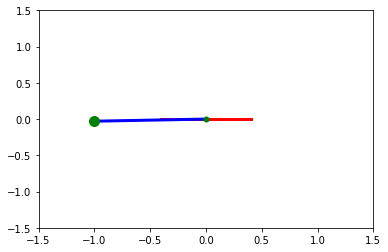

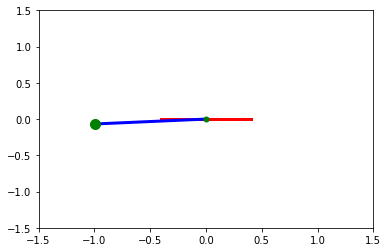

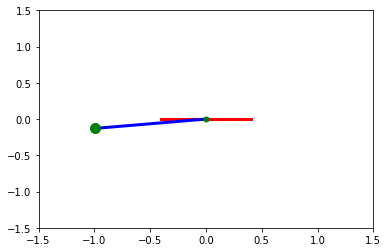

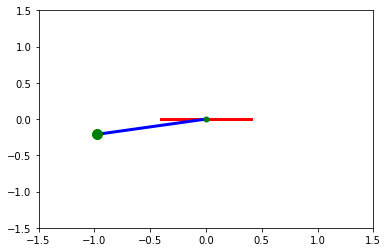

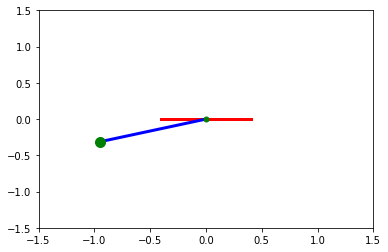

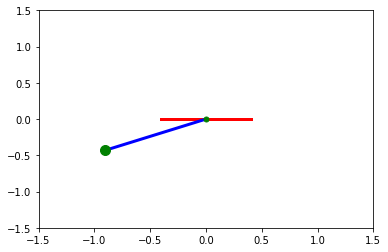

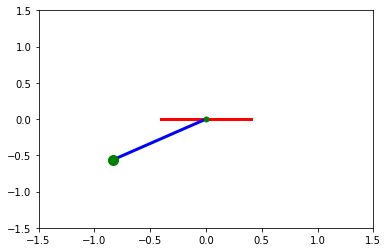

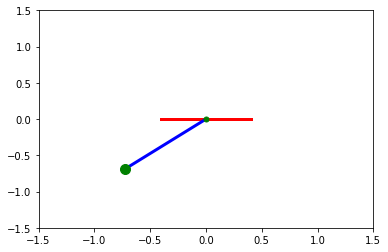

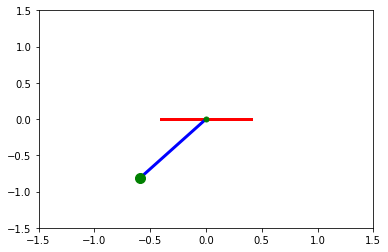

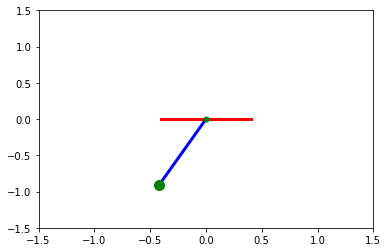

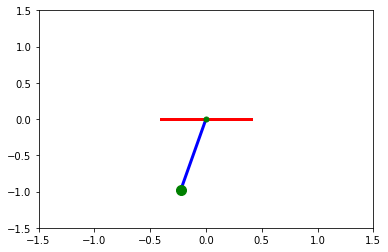

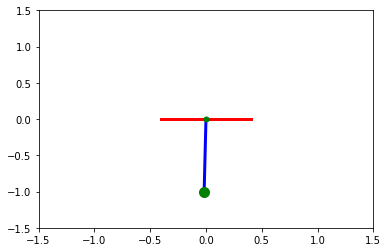

In [12]:
g = 9.81
l = 1
m = 0.001

theta_0 = [0, 4.4]
t = np.linspace(0,2.357,50)
theta = odeint(ode_func, theta_0, t , args = (g, l ,m))
ite = 1
f = 0

filename = [0]*50
for t in theta[:,0]:
  x0 = 0
  y0 = 0
  x1 = (1*math.sin(t))
  y1 = -(1*math.cos(t))
  filename[f] = str(ite)+'.png'
  ite = ite+1
  plt.figure()
  plt.plot([-0.4, 0.4], [0,0],'red', linewidth = 3)
  plt.plot([x0,x1],[y0,y1],linewidth=3, color = 'b')
  plt.plot(x0,y0,'o', markersize = 5 ,color = 'green')
  plt.plot(x1,y1,'o', markersize = 10,color = 'green')
  plt.xlim([-1.5,1.5])
  plt.ylim([-1.5,1.5])
  plt.savefig(f"figs/{filename[f]}")
  f +=1

In [15]:
# at this section we save video and you can see this video in Zip file as Clip1.avi
import cv2
import glob
import numpy as np
from numpy import array
from tensorflow.keras.utils import to_categorical
 
File_Name = [0]*50
img_array = []
k = 0
for x in filename:
    img = cv2.imread(f'figs/{x}')
    File_Name[k] = img
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    k += 1
out = cv2.VideoWriter('figs/Clip.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

x = np.array(File_Name)
x = x/255

In [16]:
n_steps = 10
Y = [0]*40
for i in range(40):
  Y[i] = i
X, y = split_sequence(x, n_steps)
Y = np.array(Y)
YY = to_categorical(Y,40)
print(YY.shape)
print(Y.shape)
print(y.shape)

(40, 40)
(40,)
(40, 288, 432, 3)


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.callbacks import History, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
from keras.datasets import cifar10
from keras import backend as K
from time import time
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.layers import LSTM, GRU, RNN
from keras.layers import TimeDistributed

# Create the model
history = History()
model = Sequential()

model.add(TimeDistributed(Conv2D(filters= 3, kernel_size=(3, 3), activation='relu', padding = 'same'), input_shape=(10, 288, 432, 3)))
model.add(TimeDistributed(MaxPooling2D(pool_size = (2, 2))))

model.add(TimeDistributed(Conv2D(filters= 3, kernel_size=(3, 3), activation='relu', padding = 'same')))
model.add(TimeDistributed(MaxPooling2D(pool_size = (2, 2))))

model.add(TimeDistributed(Conv2D(filters= 3, kernel_size=(3, 3), activation='relu', padding = 'same')))
model.add(TimeDistributed(MaxPooling2D(pool_size = (2, 2))))

model.add(TimeDistributed(Conv2D(filters= 3, kernel_size=(3, 3), activation='relu', padding = 'same')))
model.add(TimeDistributed(MaxPooling2D(pool_size = (2, 2))))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(100, input_shape=(40 ,10 , 1200)))

model.add(Dense(40, activation='softmax'))

model.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X, YY, epochs=100, batch_size=5, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 10, 288, 432, 3)   84        
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 144, 216, 3)   0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 144, 216, 3)   84        
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 72, 108, 3)    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 10, 72, 108, 3)    84        
_________________________________________________________________
time_distributed_5 (TimeDist (None, 10, 36, 54, 3)     0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 36, 54, 3)     8

In [18]:
x_input = X[39]
x_input = x_input.reshape(1,10,288,432,3)
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[1.3846652e-04 2.5227873e-04 1.4832724e-04 3.4043164e-04 3.7141269e-04
  3.1398977e-05 2.2942095e-05 1.5773249e-04 2.3596793e-05 1.9312708e-04
  2.6401872e-04 4.0971459e-04 3.6002621e-06 7.4329737e-06 1.6718912e-05
  7.8129204e-05 1.3731692e-04 3.5810570e-04 2.5822048e-04 1.7256499e-04
  2.9131520e-04 5.7130662e-04 4.4457731e-04 3.9321085e-04 7.5500406e-04
  4.8055532e-04 3.9907137e-04 1.6171427e-03 3.7304402e-04 8.5623404e-05
  6.9473521e-05 6.3067637e-05 9.8736513e-05 7.7204830e-05 4.6217904e-04
  8.3108048e-04 6.6089933e-04 6.5263896e-04 3.8049293e-03 9.8448330e-01]]


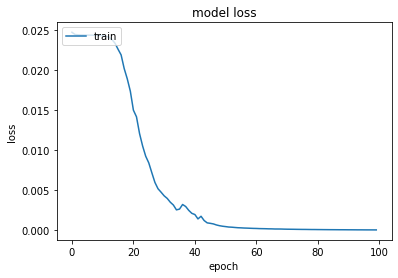

In [19]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# GRU

In [20]:
# GRU 
# Create the model
history = History()
model = Sequential()

model.add(TimeDistributed(Conv2D(filters= 3, kernel_size=(3, 3), activation='relu', padding = 'same'), input_shape=(10, 288, 432, 3)))
model.add(TimeDistributed(MaxPooling2D(pool_size = (2, 2))))

model.add(TimeDistributed(Conv2D(filters= 3, kernel_size=(3, 3), activation='relu', padding = 'same')))
model.add(TimeDistributed(MaxPooling2D(pool_size = (2, 2))))

model.add(TimeDistributed(Conv2D(filters= 3, kernel_size=(3, 3), activation='relu', padding = 'same')))
model.add(TimeDistributed(MaxPooling2D(pool_size = (2, 2))))

model.add(TimeDistributed(Conv2D(filters= 3, kernel_size=(3, 3), activation='relu', padding = 'same')))
model.add(TimeDistributed(MaxPooling2D(pool_size = (2, 2))))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(100, input_shape=(40 ,10 , 1200)))

model.add(Dense(40, activation='softmax'))

model.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X, YY, epochs=100, batch_size=5, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_9 (TimeDist (None, 10, 288, 432, 3)   84        
_________________________________________________________________
time_distributed_10 (TimeDis (None, 10, 144, 216, 3)   0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 10, 144, 216, 3)   84        
_________________________________________________________________
time_distributed_12 (TimeDis (None, 10, 72, 108, 3)    0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 10, 72, 108, 3)    84        
_________________________________________________________________
time_distributed_14 (TimeDis (None, 10, 36, 54, 3)     0         
_________________________________________________________________
time_distributed_15 (TimeDis (None, 10, 36, 54, 3)    

In [21]:
x_input = X[0]
x_input = x_input.reshape(1,10,288,432,3)
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[9.68753934e-01 2.17734370e-02 8.29148747e-04 7.79791269e-04
  4.98109948e-05 2.35484204e-05 2.19770864e-05 7.72722888e-06
  2.05160395e-05 3.76990538e-05 1.12840804e-04 3.00665008e-04
  6.17562560e-04 5.76718769e-04 2.54600804e-04 1.26370040e-04
  1.23283686e-03 1.30761706e-03 3.95193492e-04 1.86517369e-04
  5.18966233e-04 2.49138597e-04 3.42595828e-04 2.80004810e-04
  1.56731345e-04 5.39138236e-05 1.56091279e-04 6.96223724e-05
  1.58962226e-04 1.80808493e-04 1.01378246e-04 2.46002382e-05
  9.28290410e-06 4.17666743e-05 9.24307606e-05 4.20264405e-06
  1.15979419e-05 7.73094798e-05 5.17089893e-06 5.69756339e-05]]
